In [ ]:
#KNN model


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
#names = ["Kingdom", "DNAtype", "SpeciesID", "Ncodons", "SpeciesName", "UUU", "UUC", "UUA", "UUG", "CUU", 
         "CUC", "CUA",  "CUG", "AUU", "AUC", "AUA", "AUG", "GUU", "GUC", "GUA", "GUG", "GCU", "GCC", "GCA", 
         "GCG", "CCU", "CCC",  "CCA", "CCG", "UGG", "GGU", "GGC", "GGA", "GGG", "UCU", "UCC", "UCA", "UCG", 
         "AGU", "AGC", "ACU", "ACC", "ACA", "ACG", "UAU", "UAC", "CAA", "CAG", "AAU", "AAC", "UGU",  "UGC", 
         "CAU", "CAC", "AAA", "AAG", "CGU", "CGC", "CGA", "CGG", "AGA", "AGG", "GAU",  "GAC", "GAA", "GAG", 
         "UAA", "UAG", "UGA"]

In [2]:
data = pd.read_csv(r"C:\Users\Owner\OneDrive - University of Bradford\Dissertation\Data\research_dataset.csv")

data["UUU"] = pd.to_numeric(data["UUU"], errors = 'coerce')
data["UUC"] = pd.to_numeric(data["UUC"], errors = 'coerce')

data = data.replace(np.nan, 0, regex=True)

C:\Users\Owner\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [ ]:
data.head()

In [ ]:
data.dtypes

In [ ]:
data.isnull().sum()

In [ ]:
data.iloc[:, 7:69].astype(float) 

In [3]:
#set the lable and feature groups
#data.iloc[:, 5:70].head()
#data.iloc[:, :1].head()

#data.iloc[:, 5:69].astype(float)

x =  np.array(data.iloc[:, 6:69])
y = np.array(data.iloc[:, [1]])

y

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [1]], dtype=int64)

In [ ]:
#import seaborn as sns
#sns.pairplot(data, hue='Kingdom')

In [ ]:
#data = data.iloc[:, 5:69].replace('[(^\d.]', '', regex=True).astype(float)

#data

## Train Test Split

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [6]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train, y_train)

<ipython-input-6-d7c7d4e6e664>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  classifier.fit(x_train, y_train)


KNeighborsClassifier()

In [7]:
y_pred = classifier.predict(x_test)

In [8]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred)) 

cm = confusion_matrix(y_test, y_pred)
cm

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1157
           1       0.99      0.99      0.99       432
           2       0.97      0.98      0.97       175

    accuracy                           0.99      1764
   macro avg       0.99      0.99      0.99      1764
weighted avg       0.99      0.99      0.99      1764

[[1153    1    3]
 [   3  426    3]
 [   1    2  172]]


array([[1153,    1,    3],
       [   3,  426,    3],
       [   1,    2,  172]], dtype=int64)

Text(69.0, 0.5, 'Truth')

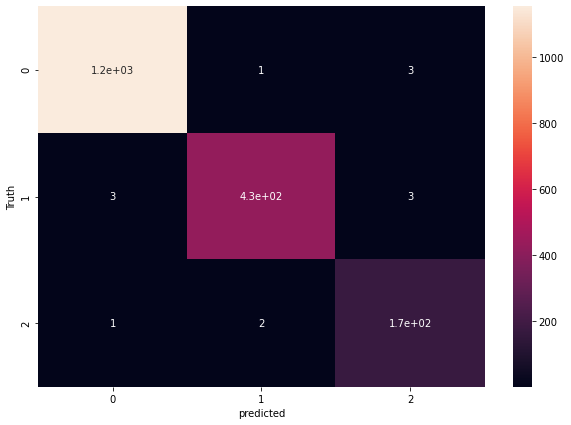

In [13]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')

# Chosing a K value

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
accuracy_rate = []

#takes time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn, data, data['DNAtype'], cv=10)
    accuracy_rate.append(score.mean())

In [ ]:
error_rate = []

#takes time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn, data, data['DNAtype'], cv=10)
    accuracy_rate.append(1-score.mean())

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color ='blue', linestyle='dashed', marker='o',
        markerfacecolor='red', markersize=10)
plt.title('Error Rave vs K value')
plt.xlabel('k')
plt.ylabel('Error Rate')

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), accuracy_rate, color ='blue', linestyle='dashed', marker='o',
        markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs K value')
plt.xlabel('k')
plt.ylabel('Accuracy Rate')